# Emotional Valence Analysis in TextaCy

Get average emotional valence over all words for the following emotions – AFRAID, AMUSED, ANGRY, ANNOYED, DONT_CARE, HAPPY, INSPIRED, SAD – using the [DepecheMood] dataset.

In [2]:
import spacy
import textacy
import textacy.lexicon_methods as lm
import matplotlib.pyplot as plt
import pandas as pd

nlp = spacy.load('en')

In [3]:
lyrics = pd.read_csv("data/SFALyrics_p.csv", dtype=str)
#lyrics['lyrics'] = lyrics['lyrics'].replace('\n',' ', regex=True)
lyrics['lyrics'] = lyrics['lyrics'].str.lower()

In [4]:
lm.download_depechemood()

In [5]:
albums = lyrics.groupby('album')
all_scores = []
i = 0
for key, album in albums:
    print("Album:" , key)
    text = album.lyrics.str.cat()
    doc = nlp(text)
    i = i + 1
    scores = lm.emotional_valence(doc)
    all_scores.append({key:scores})
    
    j_v = ['%s : %.3f'%(k,scores[k]) for k in sorted(scores.keys())]
    a = []
    b = []
    c = []
    for k in sorted(scores.keys()):
        a.append(key)
        b.append(k)
        c.append(scores[k])

    d = { 'album' : a, 'topic' : b, 'score': c }
    if i > 1:
        df = df.append(pd.DataFrame.from_dict(d), ignore_index=True) 
    else:
        df = pd.DataFrame.from_dict(d)    

Album: Dark Days/Light Years
Album: Fuzzy Logic
Album: Guerilla
Album: Hey! Venus
Album: Love Kraft
Album: Phantom Power
Album: Radiator
Album: Rings around the World


In [6]:
df.head(5)

,album,topic,score
0,Dark Days/Light Years,AFRAID,0.116305
1,Dark Days/Light Years,AMUSED,0.141709
2,Dark Days/Light Years,ANGRY,0.108818
3,Dark Days/Light Years,ANNOYED,0.115739
4,Dark Days/Light Years,DONT_CARE,0.136747


In [7]:
grp = df.groupby(['album', 'topic']).mean()
grp

score
album                  topic              
Dark Days/Light Years  AFRAID     0.116305
                       AMUSED     0.141709
                       ANGRY      0.108818
                       ANNOYED    0.115739
                       DONT_CARE  0.136747
                       HAPPY      0.119930
                       INSPIRED   0.147381
                       SAD        0.125545
Fuzzy Logic            AFRAID     0.112318
                       AMUSED     0.145716
                       ANGRY      0.107184
                       ANNOYED    0.118768
                       DONT_CARE  0.128290
                       HAPPY      0.124542
                       INSPIRED   0.147340
                       SAD        0.124410
Guerilla               AFRAID     0.116255
                       AMUSED     0.150009
                       ANGRY      0.107460
                       ANNOYED    0.118858
                       DONT_CARE  0.125421
                       HAPPY      0.119129
                       INSPIRED   0.139220
                       SAD        0.132000
Hey! Venus             AFRAID     0.105431
                       AMUSED     0.159160
                       ANGRY      0.114274
                       ANNOYED    0.103642
                       DONT_CARE  0.127383
                       HAPPY      0.129743
...                                    ...
Love Kraft             ANGRY      0.101521
                       ANNOYED    0.114373
                       DONT_CARE  0.125810
                       HAPPY      0.129841
                       INSPIRED   0.148628
                       SAD        0.121615
Phantom Power          AFRAID     0.114694
                       AMUSED     0.142188
                       ANGRY      0.102913
                       ANNOYED    0.112838
                       DONT_CARE  0.125793
                       HAPPY      0.129462
                       INSPIRED   0.152542
                       SAD        0.133697
Radiator               AFRAID     0.113959
                       AMUSED     0.142429
                       ANGRY      0.109489
                       ANNOYED    0.115305
                       DONT_CARE  0.129981
                       HAPPY      0.127700
                       INSPIRED   0.150556
                       SAD        0.122435
Rings around the World AFRAID     0.111432
                       AMUSED     0.139469
                       ANGRY      0.110730
                       ANNOYED    0.118372
                       DONT_CARE  0.128204
                       HAPPY      0.121950
                       INSPIRED   0.150718
                       SAD        0.126886

[64 rows x 1 columns]

/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


album                   topic    
Dark Days/Light Years   AFRAID       AxesSubplot(0.125,0.125;0.775x0.755)
                        AMUSED       AxesSubplot(0.125,0.125;0.775x0.755)
                        ANGRY        AxesSubplot(0.125,0.125;0.775x0.755)
                        ANNOYED      AxesSubplot(0.125,0.125;0.775x0.755)
                        DONT_CARE    AxesSubplot(0.125,0.125;0.775x0.755)
                        HAPPY        AxesSubplot(0.125,0.125;0.775x0.755)
                        INSPIRED     AxesSubplot(0.125,0.125;0.775x0.755)
                        SAD          AxesSubplot(0.125,0.125;0.775x0.755)
Fuzzy Logic             AFRAID       AxesSubplot(0.125,0.125;0.775x0.755)
                        AMUSED       AxesSubplot(0.125,0.125;0.775x0.755)
                        ANGRY        AxesSubplot(0.125,0.125;0.775x0.755)
                        ANNOYED      AxesSubplot(0.125,0.125;0.775x0.755)
                        DONT_CARE    AxesSubplot(0.125,0.125;0.775x0.755)
    

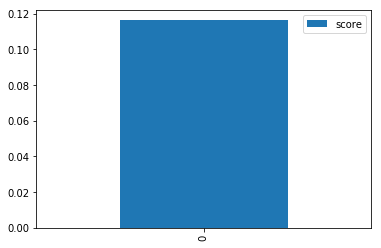

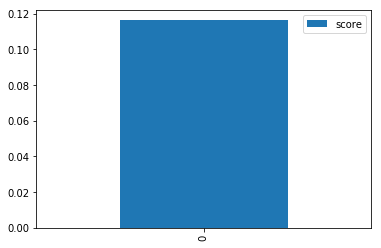

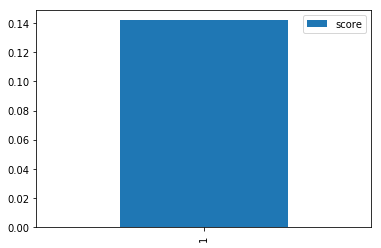

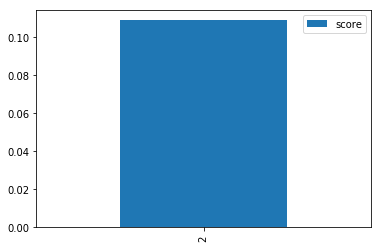

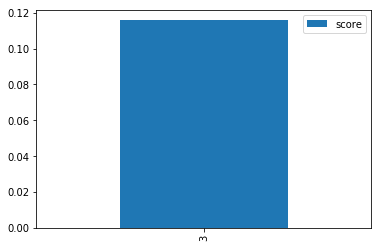

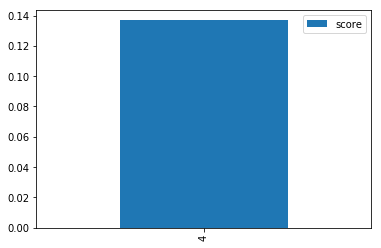

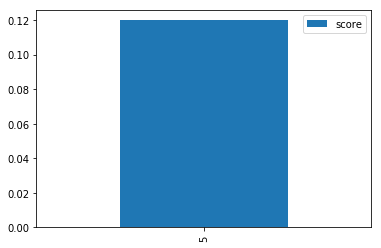

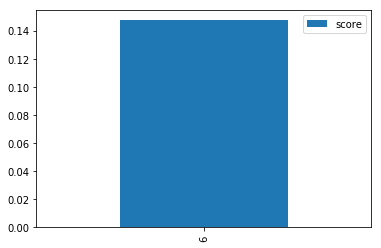

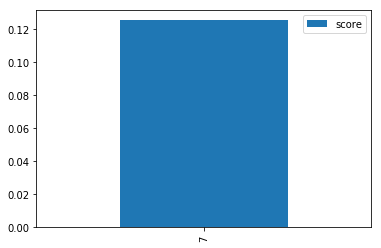

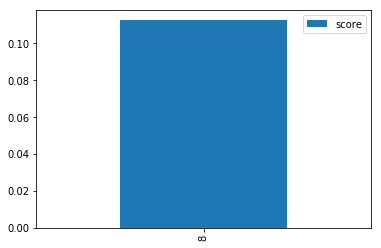

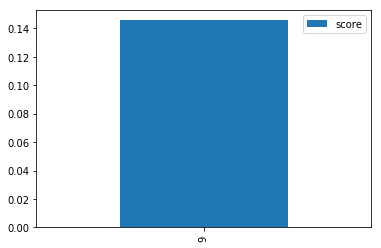

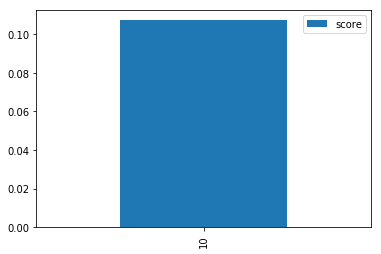

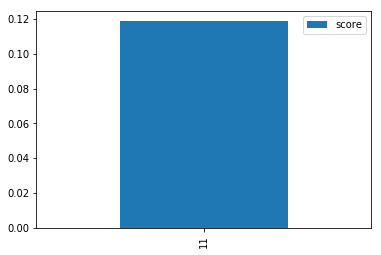

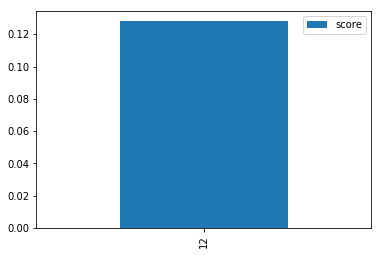

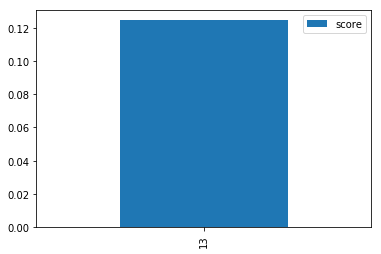

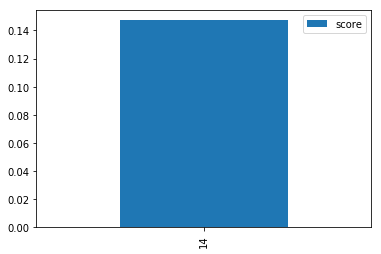

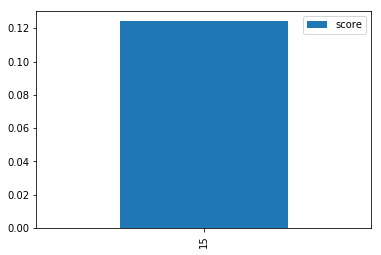

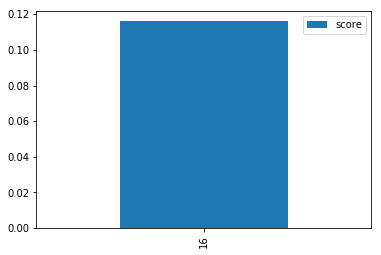

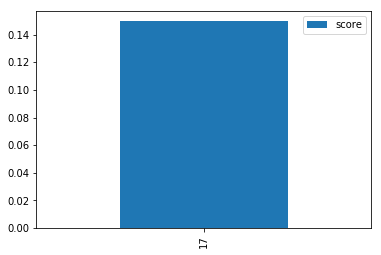

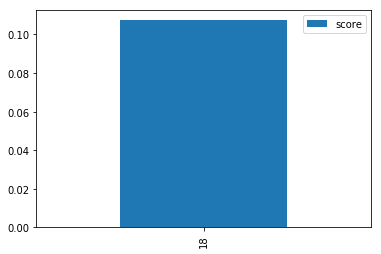

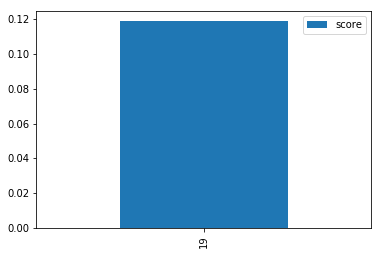

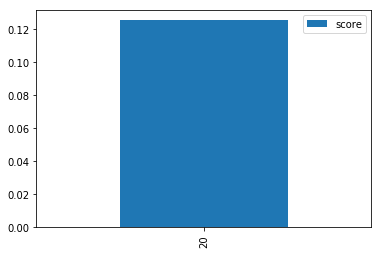

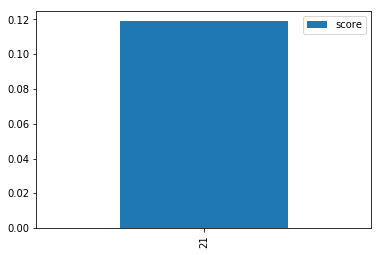

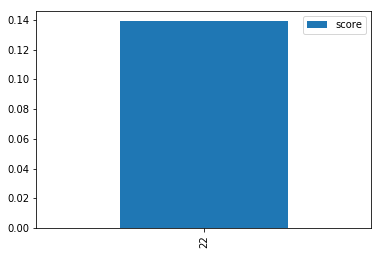

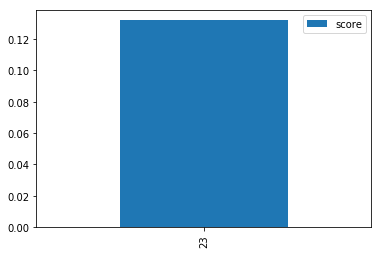

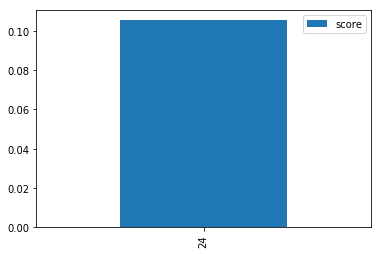

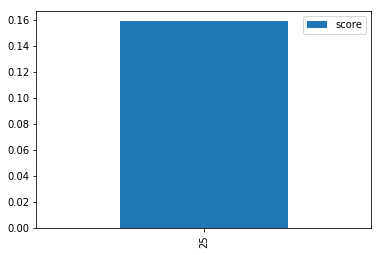

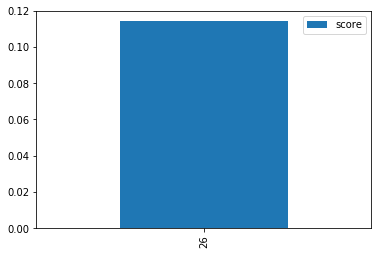

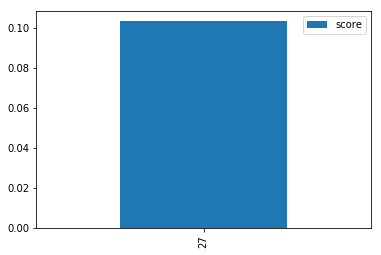

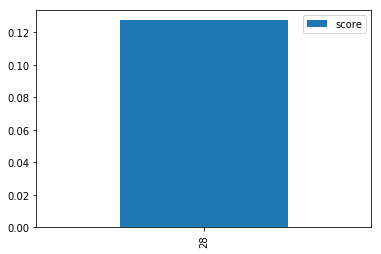

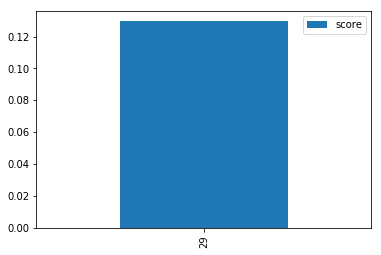

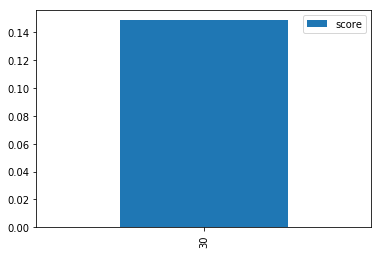

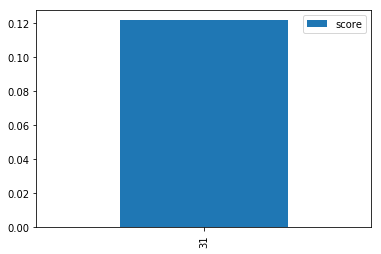

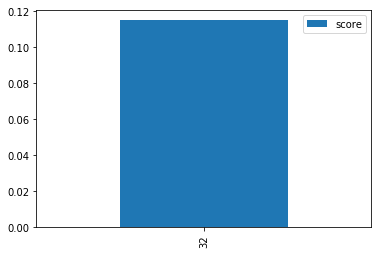

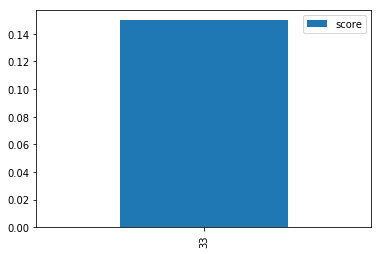

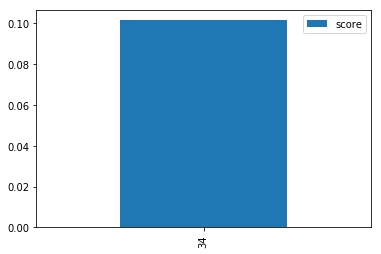

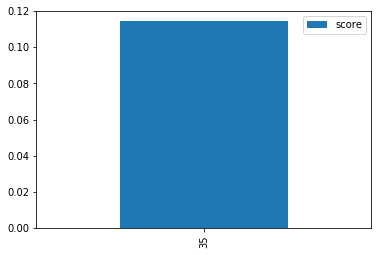

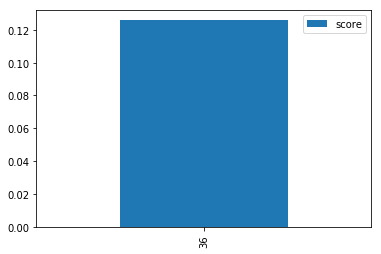

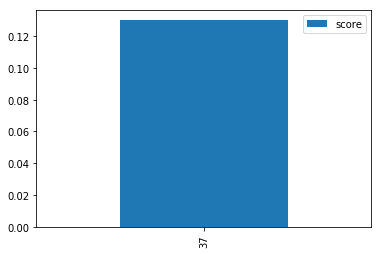

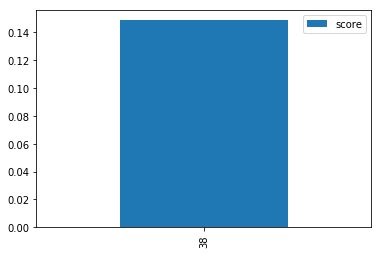

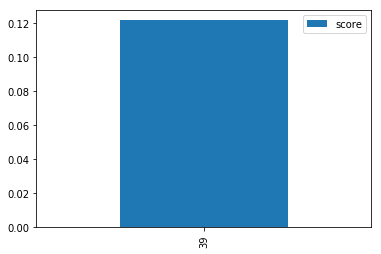

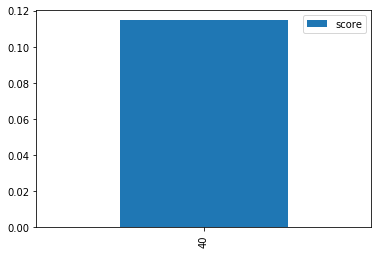

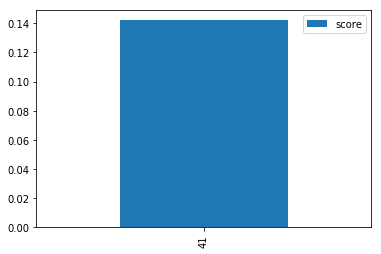

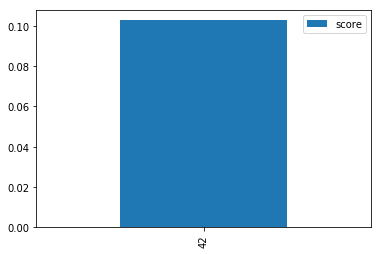

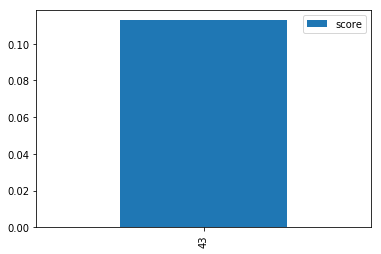

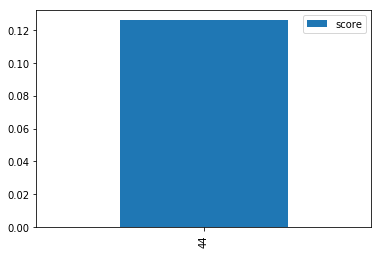

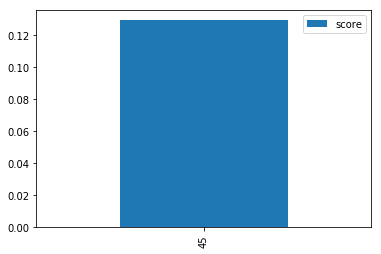

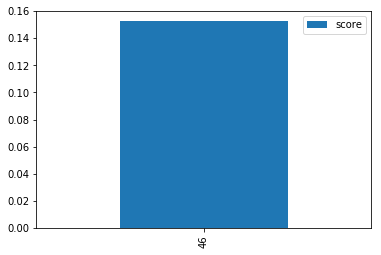

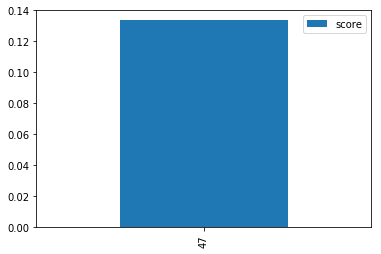

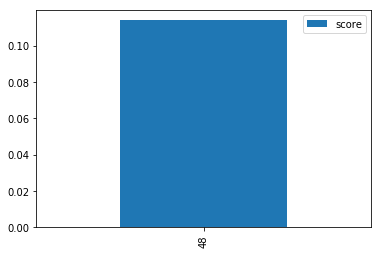

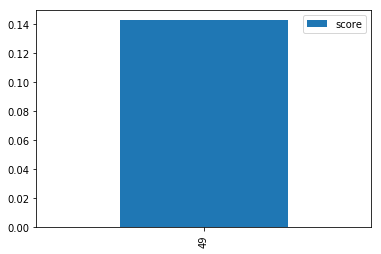

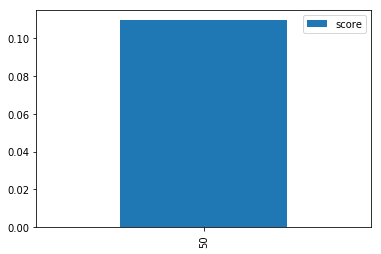

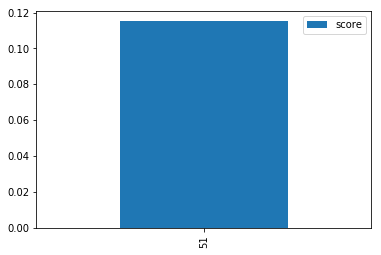

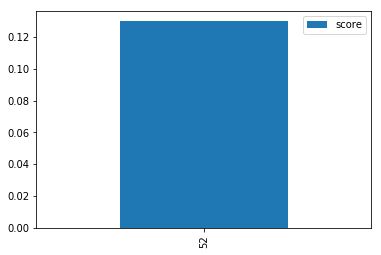

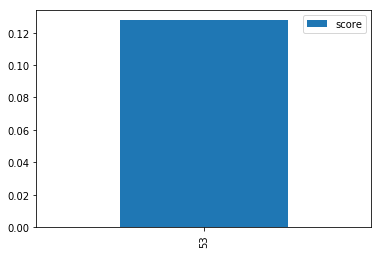

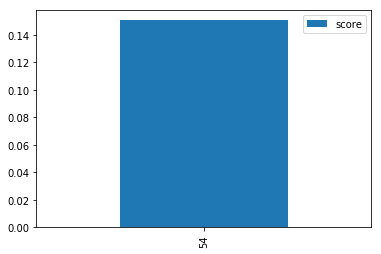

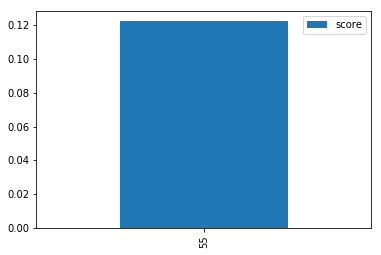

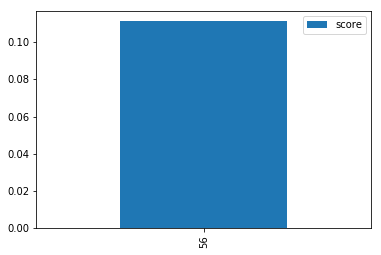

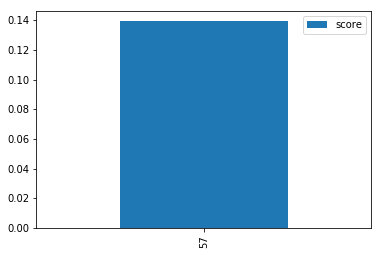

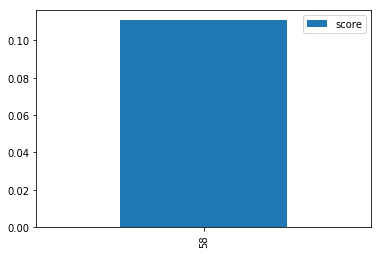

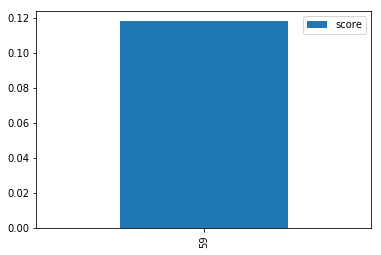

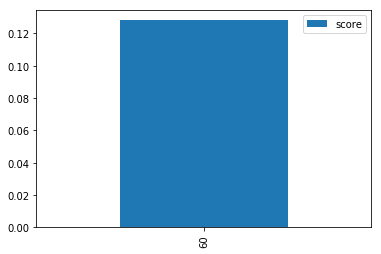

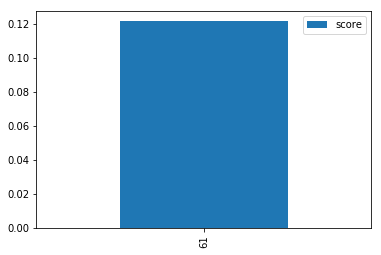

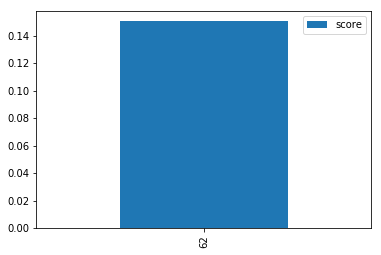

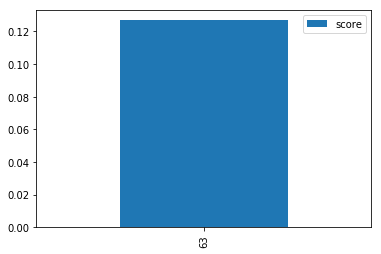

In [8]:
df.groupby(['album', 'topic']).plot.bar()

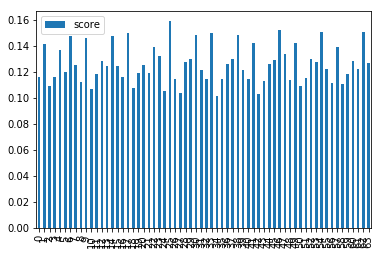

In [9]:
df.plot.bar()